In [2]:
1+2

3

In [3]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, TrainingArguments, Trainer, TrainerCallback
from datasets import load_dataset
from peft import LoraConfig, get_peft_model

In [4]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2")
model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2")

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [5]:
print(torch.cuda.is_available()) 

True


In [9]:
tokenizer.pad_token = tokenizer.eos_token

In [9]:
def generate_text(prompt, max_length=50, temperature=0.7):
    
    inputs = tokenizer(prompt, return_tensors="pt", padding=True)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    output_ids = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=max_length, 
        do_sample=True,
        temperature=temperature,
        pad_token_id=tokenizer.pad_token_id  
    )

    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

In [12]:
#cpu
prompt = str(input())
print(generate_text(prompt))

 what is water


what is water-born bacteria?
Water-born bacteria is a kind of bacteria which can cause infections if ingested. Water-born bacteria is mostly found in the ground and in rivers, lakes, and streams. It is important to know that not all water-born bacteria is harmful.
What is water-born bacteria?
Water-born bacteria is a kind of bacteria that is known to cause infections in humans. Water-born bacteria is found in rivers, lakes, and streams. People


In [9]:
#gpu
prompt = str(input())
print(generate_text(prompt))

 what is water


what is water"
    """
    def get_keywords(s: str) -> List[str]:
        return re.findall(r'\bwater\w*\b', s, flags=re.IGNORECASE)

    for word in keywords:
        if not any([word in w for w in words]):
            return f"What is {word}?"




In [12]:
from transformers import pipeline

def textGen(prompt):
    
    pipe = pipeline("text-generation", model="microsoft/phi-2")
    
    result = pipe(prompt, max_length=200, temperature=0.4)
    
    # Print the generated output
    return (result[0]['generated_text'])


In [15]:
prompt = str(input())
print(textGen(prompt))

 who are you


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


who are you?”

The man smiled and replied, “I am a traveler, and I am here to learn about the world.”

The woman nodded and said, “Well, you have come to the right place. This village is full of interesting people and stories.”

The man thanked her and continued on his journey. As he walked, he noticed that the villagers were all wearing different types of clothing. Some were wearing bright, colorful clothes, while others were wearing more muted tones.

He asked one of the villagers why they wore such different clothes, and the villager replied, “We wear different clothes to express our personalities and our moods. Some days we want to be bright and cheerful, while other days we want to be more subdued.”

The man nodded and continued on his journey. As he walked, he noticed that the villagers were all eating different types of food. Some were eating spicy


## TinyLlama 1b

In [4]:
# Use a pipeline as a high-level helper
from transformers import pipeline

messages = [
    {"role": "user", "content": "What is water?"},
]
pipe = pipeline("text-generation", model)
pipe(messages)

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

[{'generated_text': [{'role': 'user', 'content': 'What is water?'},
   {'role': 'assistant',
    'content': "Water is a liquid substance that is essential for life. It is a transparent, colorless, and odorless substance that is made up of hydrogen and oxygen atoms. Water molecules are held together by hydrogen bonds, which are strong chemical bonds between hydrogen atoms. Water is found in all living organisms, including humans, and is essential for their survival. It is also a key component of the Earth's water cycle, which transports water from the oceans to the atmosphere and back again."}]}]

In [8]:
# Use a pipeline as a high-level helper
from transformers import pipeline

messages = [
    {"role": "user", "content": "What is water?. Explain like you are Einstein"},
]
pipe = pipeline("text-generation", model = "TinyLlama/TinyLlama-1.1B-Chat-v1.0")
pipe(messages)

Device set to use cuda:0


[{'generated_text': [{'role': 'user',
    'content': 'What is water?. Explain like you are Einstein'},
   {'role': 'assistant',
    'content': "Water is a liquid substance that is made up of hydrogen and oxygen atoms. It is a fundamental component of life and is essential for all living organisms. Water is a transparent, colorless, and odorless substance that is found in all living organisms. It is the most abundant substance in the universe and is present in all forms of matter, including rocks, soil, and oceans.\n\nWater is a liquid at room temperature and pressure, but it can also be solidified into ice or frozen into water. It is a viscous substance, meaning that it has a high resistance to flow and a low resistance to flow when it is heated. This property makes water a useful material for transporting heat and other forms of energy.\n\nWater is essential for life on Earth because it is the primary source of energy for all living organisms. It is the primary source of food for plan

In [9]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")
model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")

In [24]:
def generate_answer(user_input, max_length=150, temperature=0.7, top_p=0.9, top_k=50, repetition_penalty=1.2):
    
    prompt = f"""<|user|>\n{user_input}\n<|assistant|>\n"""
    inputs = tokenizer(prompt, return_tensors="pt")

    output_ids = model.generate(
        inputs["input_ids"],
        max_length=max_length,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        repetition_penalty=repetition_penalty,
        pad_token_id=tokenizer.eos_token_id  # Proper stopping
    )

    response_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    response_text = response_text.replace(prompt, "").strip()  # Remove prompt from output

    return response_text


In [25]:
generate_answer('What is water')

'Water, also known as H2O or simply "water," is a liquid that exists in all living organisms and many non-living objects. It is essential for life on Earth because it provides the necessary conditions for chemical reactions to occur, such as photosynthesis, which allows plants to produce food from sunlight. Water can be found in various forms, including seawater, lakes, rivers, oceans, and glaciers.'

In [28]:
generate_answer('What is water?. Explain as if you are Einstein.')

'Water, also known as H2O or simply "water," is a liquid that exists in all living organisms and many non-living objects such as rocks, soil, and even space. It is composed of hydrogen atoms (H) and oxygen atoms (O). Water molecules have two hydrogen atoms bonded to one oxygen atom, forming a covalent chemical bond. The molecule has a net positive charge due to the presence of an electronegative oxygen atom. This property makes it a polar molecule, which means its electrons are distributed uneven'

In [29]:
generate_answer('Explain as if you are Einstein. What is water?')

'Water, also known as H2O or simply "water," is a liquid that exists in all living organisms and is essential for life on Earth. It consists of hydrogen atoms bonded to oxygen atoms, forming molecules with the chemical formula H2O (hydrogen and oxygen). Water has many properties that make it unique among substances:\n\n1. Liquid state: Water is a liquid at room temperature and pressure, which means it can be found in nature in its solid-liquid form. However, when exposed to heat or pressure, water becomes a'

In [30]:
generate_answer('You are Einstein. What is water?')

'Water is a liquid substance that exists in various forms, including solid (ice), liquid (water), and gaseous (steam). It is essential for life on Earth as it provides the necessary conditions for living organisms to exist. Water has many properties such as density, viscosity, boiling point, freezing point, heat capacity, thermal conductivity, electrical conductivity, and more.'

In [38]:
def generate_with_log_probs(user_input, max_length=150, temperature=0.7, top_p=0.9, top_k=50, repetition_penalty=1.2):
    
    prompt = f"""<|user|>\n{user_input}\n<|assistant|>\n"""
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate response with log probabilities
    outputs = model.generate(
        inputs["input_ids"],
        max_length=max_length,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        repetition_penalty=repetition_penalty,
        pad_token_id=tokenizer.eos_token_id,
        return_dict_in_generate=True,
        output_scores=True  # Enable log probability tracking
    )

    # Decode generated text
    generated_tokens = outputs.sequences[0][inputs["input_ids"].shape[-1]:]  # Extract only new tokens
    response_text = tokenizer.decode(generated_tokens, skip_special_tokens=True)

    # Compute log probabilities
    log_probs = []
    for i, token_id in enumerate(generated_tokens):
        token_logits = outputs.scores[i]  # Logits for this step
        token_probs = torch.nn.functional.log_softmax(token_logits, dim=-1)  # Convert to log probs
        log_prob = token_probs[0, token_id].item()  # Extract log prob for chosen token
        log_probs.append((tokenizer.decode(token_id), log_prob))  # Store token and log prob
    

    return response_text, log_probs

Response: Water is a liquid substance that exists in all living organisms, including humans. It is composed of hydrogen and oxygen atoms held together by the force of attraction between them known as electrostatic repulsion (electrolysis). Water molecules are made up of two hydrogen atoms and one oxygen atom, with each hydrogen atom having an electronegativity difference from its neighboring hydrogen atom. The polarity of these electrons determines whether water has a positive or negative charge, which affects its properties such as boiling point, freezing point, density, viscosity, and solubility.

Token-wise Log Probabilities:


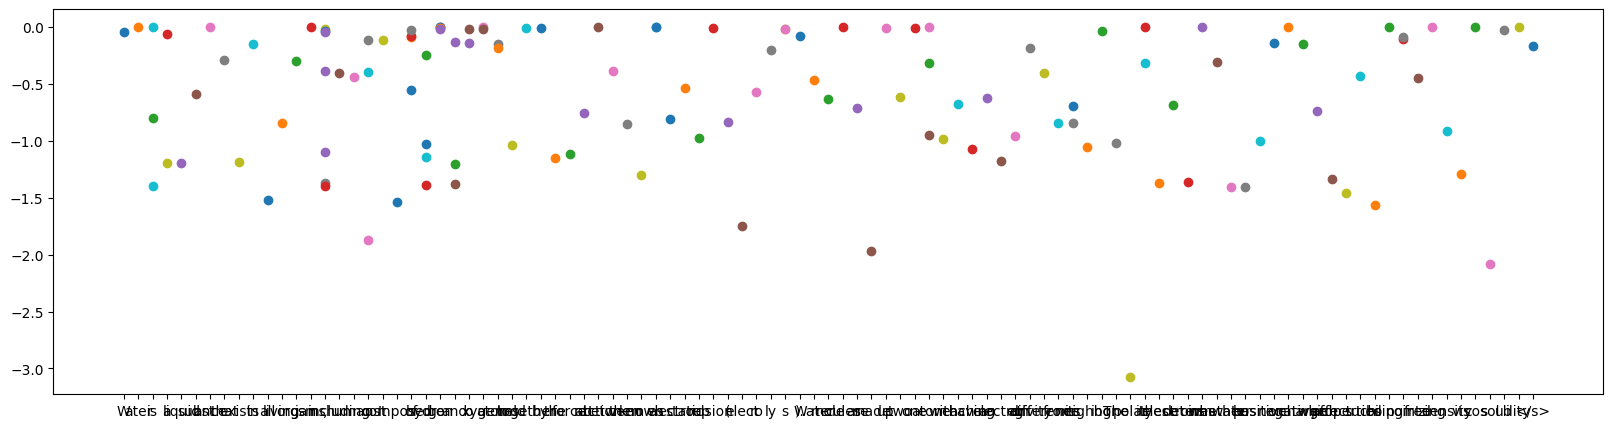

In [44]:
# Example usage
response, log_probs = generate_with_log_probs("What is water?")
print("Response:", response)
print("\nToken-wise Log Probabilities:")
plt.figure(figsize=(20,5))
for token, log_prob in log_probs:
    plt.scatter(token,log_prob)